In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r'glass.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.describe(), 

(               RI          Na          Mg          Al          Si           K  \
 count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
 mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
 std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
 min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
 25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
 50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
 75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
 max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   
 
                Ca          Ba          Fe        Type  
 count  214.000000  214.000000  214.000000  214.000000  
 mean     8.956963    0.175047    0.057009    2.780374  
 std      1.423153    0.497219    0.097439    2.103739  
 min      5.430000    0.000000  

In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
import seaborn as sns

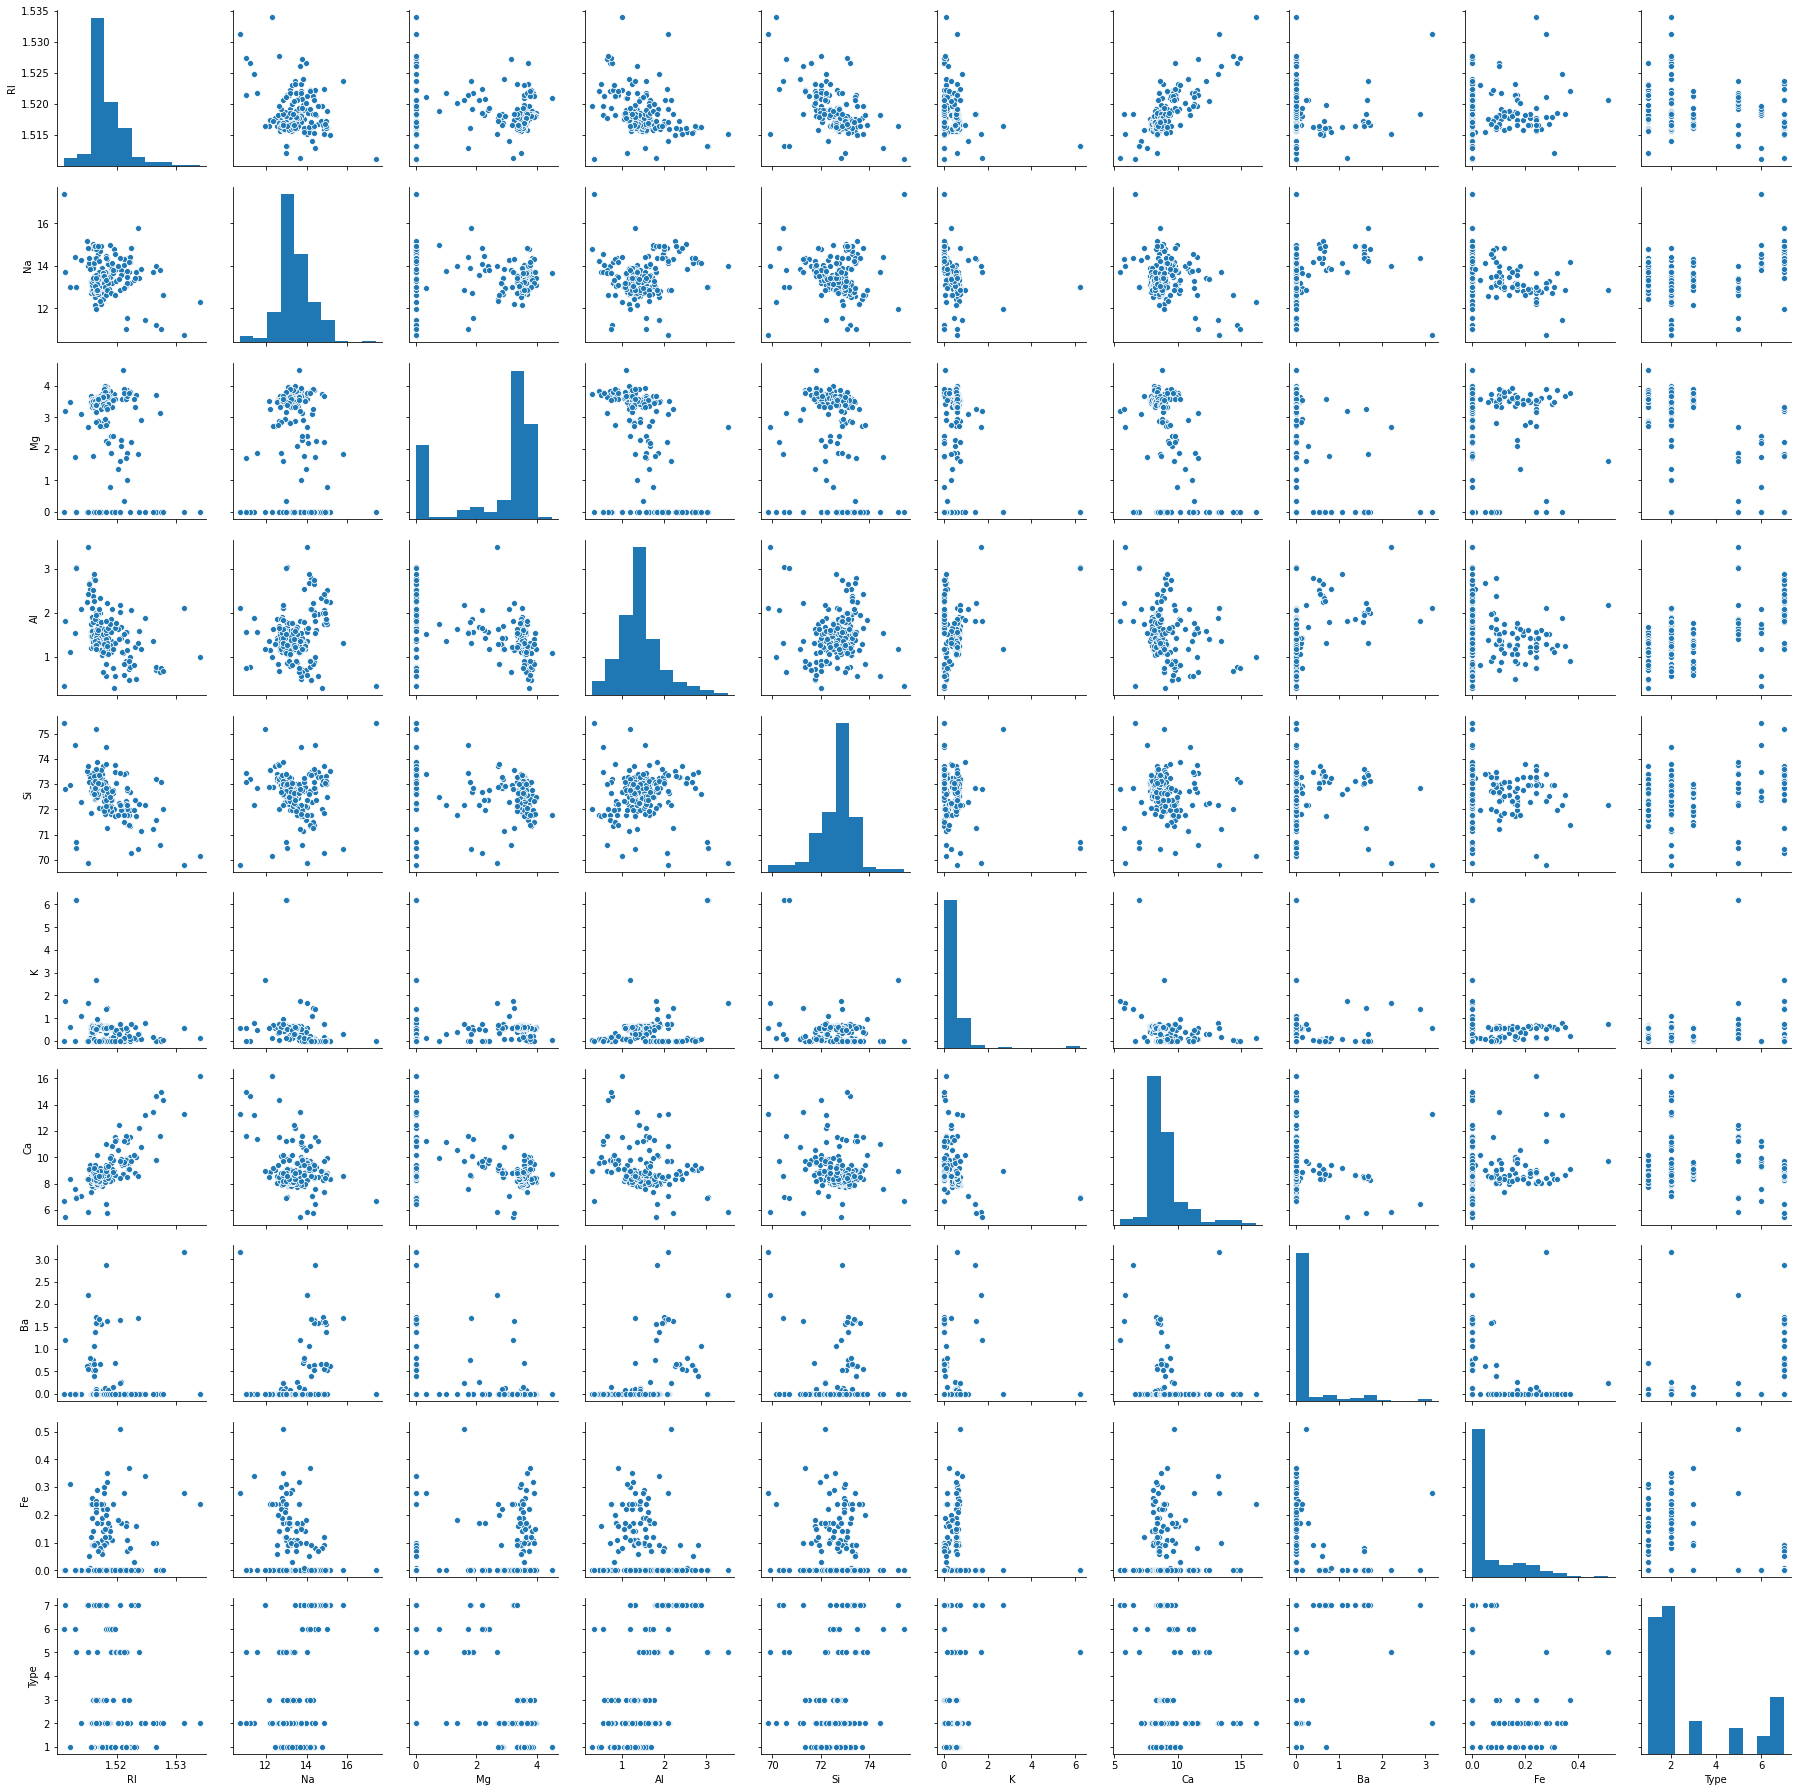

In [7]:
sns.pairplot(df)

In [8]:
df.info() #cheking the info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
df.Type.value_counts() #check how much point for each unique value

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [10]:
df[df.Type ==6]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
176,1.51905,14.00,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.0,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.0,9.32,0.0,0.0,6
180,1.51299,14.40,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
181,1.51888,14.99,0.78,1.74,72.50,0.0,9.95,0.0,0.0,6
182,1.51916,14.15,0.00,2.09,72.74,0.0,10.88,0.0,0.0,6
183,1.51969,14.56,0.00,0.56,73.48,0.0,11.22,0.0,0.0,6
184,1.51115,17.38,0.00,0.34,75.41,0.0,6.65,0.0,0.0,6


# check the outlier

In [11]:
from sklearn.ensemble import IsolationForest
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [12]:
# predictions
x_pred_outliers = clf.predict(df)

In [13]:
df['anomaly']=clf.predict(df)

In [14]:
#Print the outlier data points
df[df['anomaly']==-1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,anomaly
106,1.53125,10.73,0.00,2.1,69.81,0.58,13.30,3.15,0.28,2,-1
107,1.53393,12.30,0.00,1.0,70.16,0.12,16.19,0.00,0.24,2,-1
163,1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.20,0.00,5,-1


In [15]:
df_cleaned= df.drop(df.index[[106,107,163]],axis=0).reset_index()

In [16]:
df_cleaned=df_cleaned.drop(['anomaly', 'index'], axis=1)


In [17]:
df_cleaned

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
206,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
207,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
208,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
209,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [18]:
X = df_cleaned.iloc[:,:-1]
Y = df_cleaned.iloc[:,-1]

In [19]:
#scallig the cleaned data
from sklearn.preprocessing import MinMaxScaler

In [20]:
scallig = MinMaxScaler()
X_scalled = scallig.fit_transform(X)


In [21]:
X_scalled

array([[0.59326113, 0.41194969, 1.        , ..., 0.34837356, 0.        ,
        0.        ],
       [0.38868833, 0.45125786, 0.80178174, ..., 0.25183631, 0.        ,
        0.        ],
       [0.30264741, 0.39465409, 0.79064588, ..., 0.24658972, 0.        ,
        0.        ],
       ...,
       [0.57160048, 0.52515723, 0.        , ..., 0.3158447 , 0.56944444,
        0.        ],
       [0.32250301, 0.52830189, 0.        , ..., 0.32004197, 0.54513889,
        0.        ],
       [0.35860409, 0.50471698, 0.        , ..., 0.33473242, 0.57986111,
        0.        ]])

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalled, Y , test_size=0.3, random_state=0)

In [23]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((147, 9), (64, 9), (147,), (64,))

In [24]:
from sklearn.neighbors import KNeighborsClassifier # fiting KNN model

In [62]:
model = KNeighborsClassifier(n_neighbors=3) #taking 3 after grid cv
results = model.fit(X_scalled, Y ) # fiting KNN model

In [63]:
#Predicting the test set result  
y_pred= model.predict(Xtest) 

In [64]:
y_pred

array([6, 2, 1, 1, 2, 2, 2, 7, 1, 2, 2, 2, 2, 3, 1, 5, 2, 1, 2, 7, 2, 1,
       5, 1, 1, 7, 1, 2, 2, 1, 7, 1, 2, 1, 3, 2, 7, 3, 6, 1, 1, 7, 2, 1,
       3, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 7, 1, 1, 2, 1, 2, 2, 2],
      dtype=int64)

In [65]:
#compairing the predicted data with ytest data

In [84]:
#to cheak the accuracy Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.875

In [91]:
#Check performance using roc
from sklearn.metrics import roc_auc_score
#roc_auc_score(ytest, y_pred, )

In [66]:
data = pd.DataFrame({'ytest':ytest,'y_pred':y_pred},)

In [67]:
data.head(15)

,ytest,y_pred
173,6,6
74,2,2
12,1,1
5,1,1
55,1,2
89,2,2
125,2,2
194,7,7
52,1,1
71,2,2


In [68]:
#check GridSearchCV
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(3,40))
param_grid = dict(n_neighbors=n_neighbors)

In [69]:
param_grid

{'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39])}

In [110]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv =40)
grid.fit(X_scalled, Y)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=40, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])})

In [111]:
grid.best_score_

0.6900000000000001

In [113]:
grid.best_params_

{'n_neighbors': 3}

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Pytho

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)


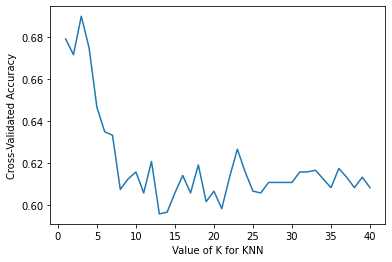

In [109]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scalled, Y, cv=40)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [97]:
k_scores,

([0.6493506493506495,
  0.658874458874459,
  0.6686147186147186,
  0.6541125541125542,
  0.6448051948051947,
  0.6636363636363636,
  0.6402597402597403,
  0.6023809523809524,
  0.5976190476190476,
  0.6116883116883116,
  0.5829004329004328,
  0.5928571428571427,
  0.5928571428571429,
  0.6071428571428571,
  0.5974025974025974,
  0.6071428571428571,
  0.5974025974025974,
  0.6021645021645022,
  0.6021645021645022,
  0.6021645021645022,
  0.5974025974025974,
  0.5926406926406927,
  0.6067099567099566,
  0.6021645021645022,
  0.6116883116883117,
  0.606926406926407,
  0.6116883116883117,
  0.6116883116883117,
  0.6164502164502165,
  0.6116883116883117,
  0.6023809523809522,
  0.6021645021645021,
  0.606926406926407,
  0.5926406926406925,
  0.5974025974025973,
  0.602164502164502,
  0.5974025974025973,
  0.5926406926406925,
  0.5974025974025973,
  0.5926406926406925],)

In [104]:
num_folds =40
kfold = KFold(n_splits=40)

model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, X_scalled, Y ,cv=kfold)

In [105]:
(results*100).mean()

61.41666666666667

In [106]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [107]:
model.score(Xtrain,ytrain)

0.7959183673469388

In [108]:
model.score(Xtest,ytest)

0.671875